In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import log_loss


def not_that_deep(X, y, sigma=10., loss="mse", seed=0):
    '''
    X: input data
    y: labels
    sigma: sigma value for bump activation
    loss: mse or bce (binary cross entropy, equiv to log loss)
    seed: random seed
    '''
    
    # x = [1, x_1, x_2]

    X_ = np.vstack((X.shape[0] * [1], X.T)).T
    
    np.random.seed(seed)
    beta = np.random.randn(X_.shape[1])

    def xorloss(beta):
        y_pred = np.exp(-0.5 * np.square(X_.dot(beta) / sigma)) 

        # without smoothing
        # tildy = X_.dot(beta) != 0
        
        if loss == "mse":
            return np.linalg.norm(y - y_pred) ** 2
        elif loss == "bce":
            return log_loss(y, y_pred)

    res = minimize(xorloss, beta, method="BFGS")

    return res.x


def decision(w, b, x_0):
    """
    The hyperplane is H = {x: <w, x> + b = 0}.
    This function return x[1] given x[0] for x in H
    """
    return - (x_0 * w[0] + b) / w[1]

Betas = [ 44.56763053 -45.00623116 -44.78855279]


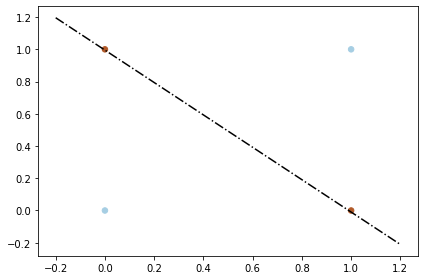

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 1, 1, 0], dtype=np.float32)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.grid(None)

x_range = [-0.2, 1.2]
beta = not_that_deep(X, y, sigma=10., loss="mse", seed=2023)
print(f"Betas = {beta}")
dec_x = [decision(beta[1:], beta[0], x_) for x_ in x_range]
plt.plot(x_range, dec_x, c="k", linestyle="-.")
plt.grid(None)
plt.tight_layout()
plt.show()

Betas = [ 53.10898041 -53.10745961 -53.10953304]


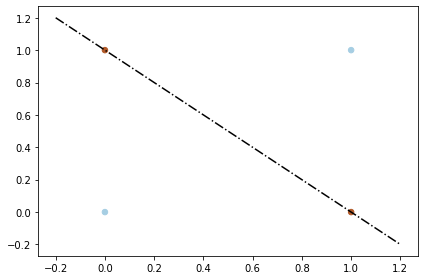

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.grid(None)

x_range = [-0.2, 1.2]
beta = not_that_deep(X, y, sigma=10., loss="bce", seed=2023)
print(f"Betas = {beta}")
dec_x = [decision(beta[1:], beta[0], x_) for x_ in x_range]
plt.plot(x_range, dec_x, c="k", linestyle="-.")
plt.grid(None)
plt.tight_layout()
plt.show()